=== WELL-SEPARATED CLASSES (separation = 2.0) ===
Dataset shape: (1000, 3)
Class distribution:
class
0    500
1    500
Name: count, dtype: int64

First 5 rows:
         x1        x2  class
0 -1.503286 -1.073822      0
1 -2.138264 -0.090583      0
2 -1.352311 -3.398568      0
3 -0.476970 -1.437031      0
4 -2.234153 -2.650643      0


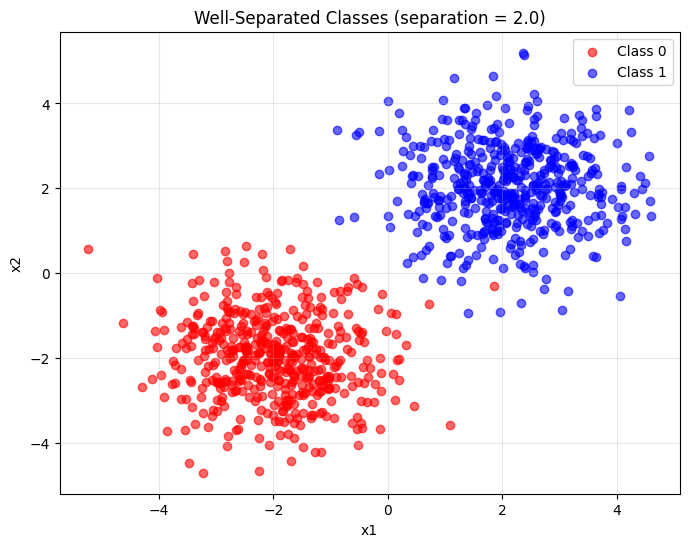

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def generate_classification_data(n_samples=1000, separation=2.0, random_state=42):
    """
    Generate 2D classification data with two clearly separated classes.
    
    Parameters:
    - n_samples: Number of samples to generate
    - separation: Distance between class centers (higher = more separated)
    - random_state: Random seed for reproducibility
    """
    np.random.seed(random_state)
    
    # Generate class 0 centered around (-separation, -separation)
    x1_class0 = np.random.randn(n_samples // 2) - separation
    x2_class0 = np.random.randn(n_samples // 2) - separation
    y_class0 = np.zeros(n_samples // 2)
    
    # Generate class 1 centered around (+separation, +separation)
    x1_class1 = np.random.randn(n_samples // 2) + separation
    x2_class1 = np.random.randn(n_samples // 2) + separation
    y_class1 = np.ones(n_samples // 2)
    
    # Combine both classes
    X = np.column_stack([
        np.concatenate([x1_class0, x1_class1]),
        np.concatenate([x2_class0, x2_class1])
    ])
    y = np.concatenate([y_class0, y_class1])
    
    # Create DataFrame
    df = pd.DataFrame({
        'x1': X[:, 0],
        'x2': X[:, 1],
        'class': y.astype(int)
    })
    
    return df

# Generate well-separated data
print("=== WELL-SEPARATED CLASSES (separation = 2.0) ===")
data_separated = generate_classification_data(n_samples=1000, separation=2.0)

print(f"Dataset shape: {data_separated.shape}")
print(f"Class distribution:\n{data_separated['class'].value_counts()}")
print("\nFirst 5 rows:")
print(data_separated.head())

# Plot the data
plt.figure(figsize=(8, 6))
class_0 = data_separated[data_separated['class'] == 0]
class_1 = data_separated[data_separated['class'] == 1]

plt.scatter(class_0['x1'], class_0['x2'], c='red', alpha=0.6, label='Class 0')
plt.scatter(class_1['x1'], class_1['x2'], c='blue', alpha=0.6, label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Well-Separated Classes (separation = 2.0)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Training set: 800 samples
Test set: 200 samples
--------------------------------------------------
=== METHOD 1: MLP CLASSIFIER WITH RELU ACTIVATION ===
Accuracy: 0.9950
Number of iterations: 767
Final loss: 0.0458
\n=== METHOD 2: LOGISTIC REGRESSION WITH SIGMOID (DEFAULT) ===
Accuracy: 1.0000
Coefficients: [3.42740332 3.624581  ]
Intercept: -0.0575
\n==================================================
CLASSIFICATION REPORTS - WELL-SEPARATED DATA
Method 1 (MLP with ReLU):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

\nMethod 2 (Logistic Regression with Sigmoid):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.

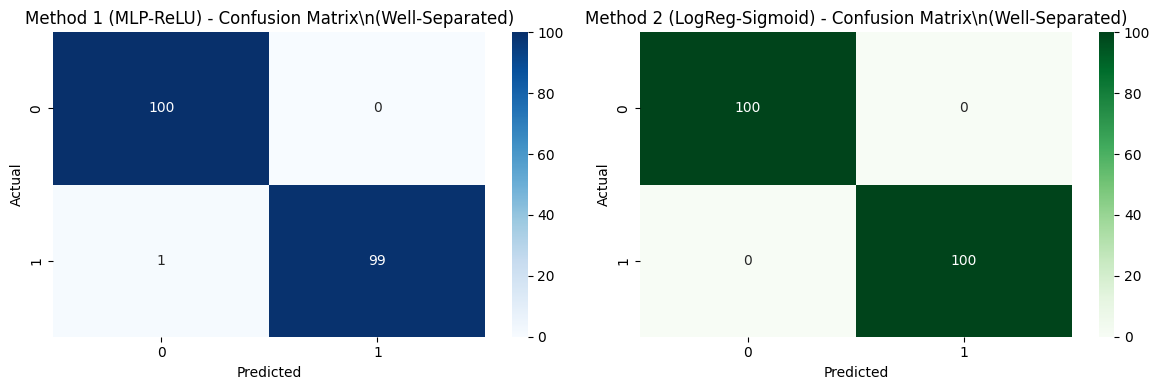

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Prepare features and target for well-separated data
X_separated = data_separated[['x1', 'x2']]
y_separated = data_separated['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_separated, y_separated, test_size=0.2, random_state=42, stratify=y_separated
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print("-" * 50)

# Scale features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Method 1: MLP Classifier with ReLU activation
print("=== METHOD 1: MLP CLASSIFIER WITH RELU ACTIVATION ===")
model1_relu = MLPClassifier(
    hidden_layer_sizes=(1,),  # Single layer with 1 neuron
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

model1_relu.fit(X_train_scaled, y_train)
y_pred1_relu = model1_relu.predict(X_test_scaled)
accuracy1_relu = accuracy_score(y_test, y_pred1_relu)

print(f"Accuracy: {accuracy1_relu:.4f}")
print(f"Number of iterations: {model1_relu.n_iter_}")
print(f"Final loss: {model1_relu.loss_:.4f}")

# Method 2: Logistic Regression with sigmoid (default)
print("\\n=== METHOD 2: LOGISTIC REGRESSION WITH SIGMOID (DEFAULT) ===")
model2_sigmoid = LogisticRegression(random_state=42)

model2_sigmoid.fit(X_train_scaled, y_train)
y_pred2_sigmoid = model2_sigmoid.predict(X_test_scaled)
accuracy2_sigmoid = accuracy_score(y_test, y_pred2_sigmoid)

print(f"Accuracy: {accuracy2_sigmoid:.4f}")
print(f"Coefficients: {model2_sigmoid.coef_[0]}")
print(f"Intercept: {model2_sigmoid.intercept_[0]:.4f}")

print("\\n" + "="*50)
print("CLASSIFICATION REPORTS - WELL-SEPARATED DATA")
print("="*50)
print("Method 1 (MLP with ReLU):")
print(classification_report(y_test, y_pred1_relu))
print("\\nMethod 2 (Logistic Regression with Sigmoid):")
print(classification_report(y_test, y_pred2_sigmoid))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

cm1 = confusion_matrix(y_test, y_pred1_relu)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Method 1 (MLP-ReLU) - Confusion Matrix\\n(Well-Separated)')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

cm2 = confusion_matrix(y_test, y_pred2_sigmoid)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Method 2 (LogReg-Sigmoid) - Confusion Matrix\\n(Well-Separated)')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

c:\Users\HP\Documents\github_project\atelier_kdd\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\github_project\atelier_kdd\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_8960\2968547827.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


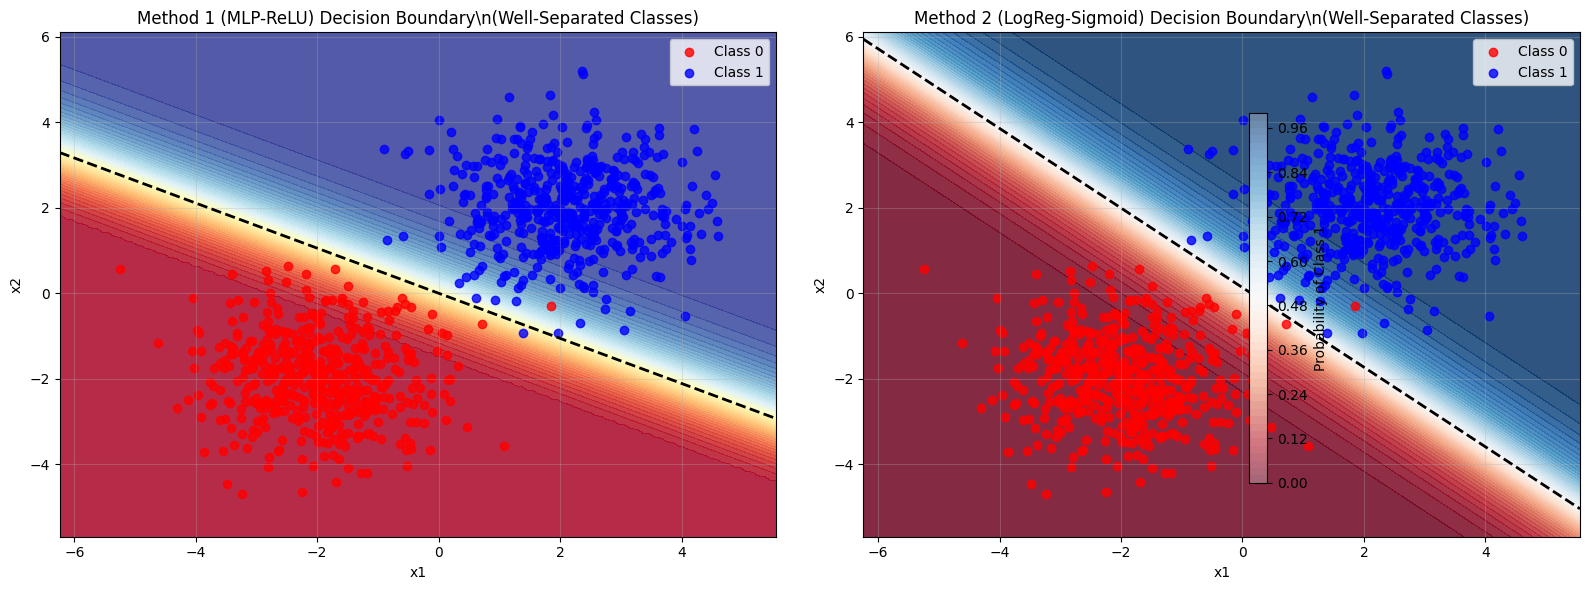

In [8]:
# Visualization of decision boundary for well-separated data
def plot_decision_boundary_comparison(X, y, model1, model2, title_suffix):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    for i, (model, method_name, cmap) in enumerate([(model1, 'Method 1 (MLP-ReLU)', 'RdYlBu'), 
                                                    (model2, 'Method 2 (LogReg-Sigmoid)', 'RdBu')]):
        # Create a mesh
        h = 0.1
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # Scale the mesh points using the same scaler
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        mesh_points_scaled = scaler.transform(mesh_points)
        Z = model.predict_proba(mesh_points_scaled)[:, 1]
        Z = Z.reshape(xx.shape)
        
        # Plot
        axes[i].contourf(xx, yy, Z, levels=50, alpha=0.6, cmap=cmap)
        im = axes[i].contourf(xx, yy, Z, levels=50, alpha=0.6, cmap=cmap)
        
        # Plot data points (original scale)
        class_0 = X[y == 0]
        class_1 = X[y == 1]
        axes[i].scatter(class_0.iloc[:, 0], class_0.iloc[:, 1], c='red', alpha=0.8, label='Class 0')
        axes[i].scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], c='blue', alpha=0.8, label='Class 1')
        
        # Decision boundary (probability = 0.5)
        axes[i].contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)
        
        axes[i].set_xlabel('x1')
        axes[i].set_ylabel('x2')
        axes[i].set_title(f'{method_name} Decision Boundary\\n({title_suffix})')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    # Add colorbar
    plt.colorbar(im, ax=axes, label='Probability of Class 1', shrink=0.8)
    plt.tight_layout()
    plt.show()

# Plot decision boundaries for both methods (well-separated data)
plot_decision_boundary_comparison(X_separated, y_separated, model1_relu, model2_sigmoid, 
                                'Well-Separated Classes')

=== POORLY-SEPARATED CLASSES (separation = 0.5) ===
Dataset shape: (1000, 3)
Class distribution:
class
0    500
1    500
Name: count, dtype: int64


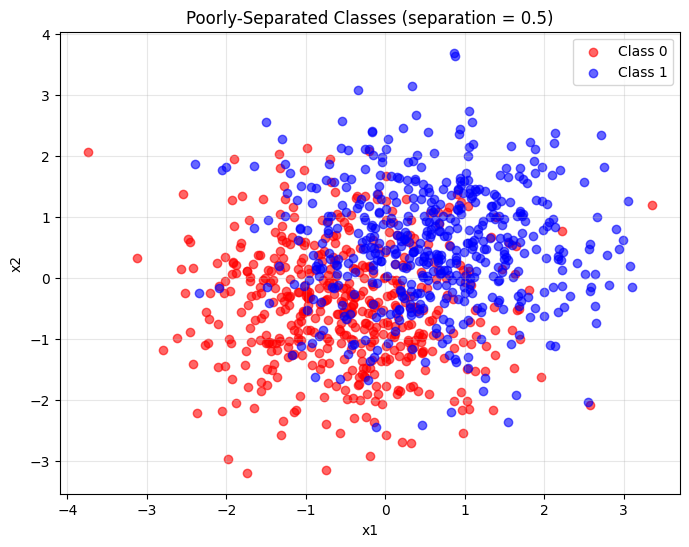

Training set: 800 samples
Test set: 200 samples


In [9]:
# Generate poorly separated data
print("=== POORLY-SEPARATED CLASSES (separation = 0.5) ===")
data_close = generate_classification_data(n_samples=1000, separation=0.5)

print(f"Dataset shape: {data_close.shape}")
print(f"Class distribution:\n{data_close['class'].value_counts()}")

# Plot the data
plt.figure(figsize=(8, 6))
class_0_close = data_close[data_close['class'] == 0]
class_1_close = data_close[data_close['class'] == 1]

plt.scatter(class_0_close['x1'], class_0_close['x2'], c='red', alpha=0.6, label='Class 0')
plt.scatter(class_1_close['x1'], class_1_close['x2'], c='blue', alpha=0.6, label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Poorly-Separated Classes (separation = 0.5)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Prepare features and target for poorly-separated data
X_close = data_close[['x1', 'x2']]
y_close = data_close['class']

# Split the data
X_train_close, X_test_close, y_train_close, y_test_close = train_test_split(
    X_close, y_close, test_size=0.2, random_state=42, stratify=y_close
)

print(f"Training set: {X_train_close.shape[0]} samples")
print(f"Test set: {X_test_close.shape[0]} samples")

METHODS ON POORLY-SEPARATED DATA
=== METHOD 1: MLP CLASSIFIER WITH RELU - POORLY-SEPARATED ===
Accuracy: 0.7550
Number of iterations: 511
Final loss: 0.4710
\n=== METHOD 2: LOGISTIC REGRESSION WITH SIGMOID - POORLY-SEPARATED ===
Accuracy: 0.7750
Coefficients: [2.45892356 2.36756097]
Intercept: 0.0297
\n==================================================
CLASSIFICATION REPORTS - POORLY-SEPARATED DATA
Method 1 (MLP with ReLU):
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       100
           1       0.76      0.75      0.75       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200

\nMethod 2 (Logistic Regression with Sigmoid):
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.78      0.76      0.77       100

    accuracy                      

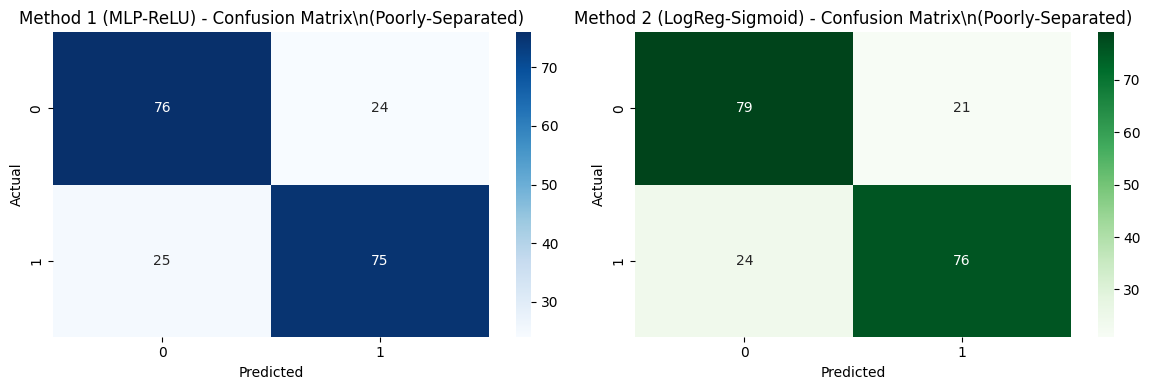

c:\Users\HP\Documents\github_project\atelier_kdd\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\github_project\atelier_kdd\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_8960\2968547827.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


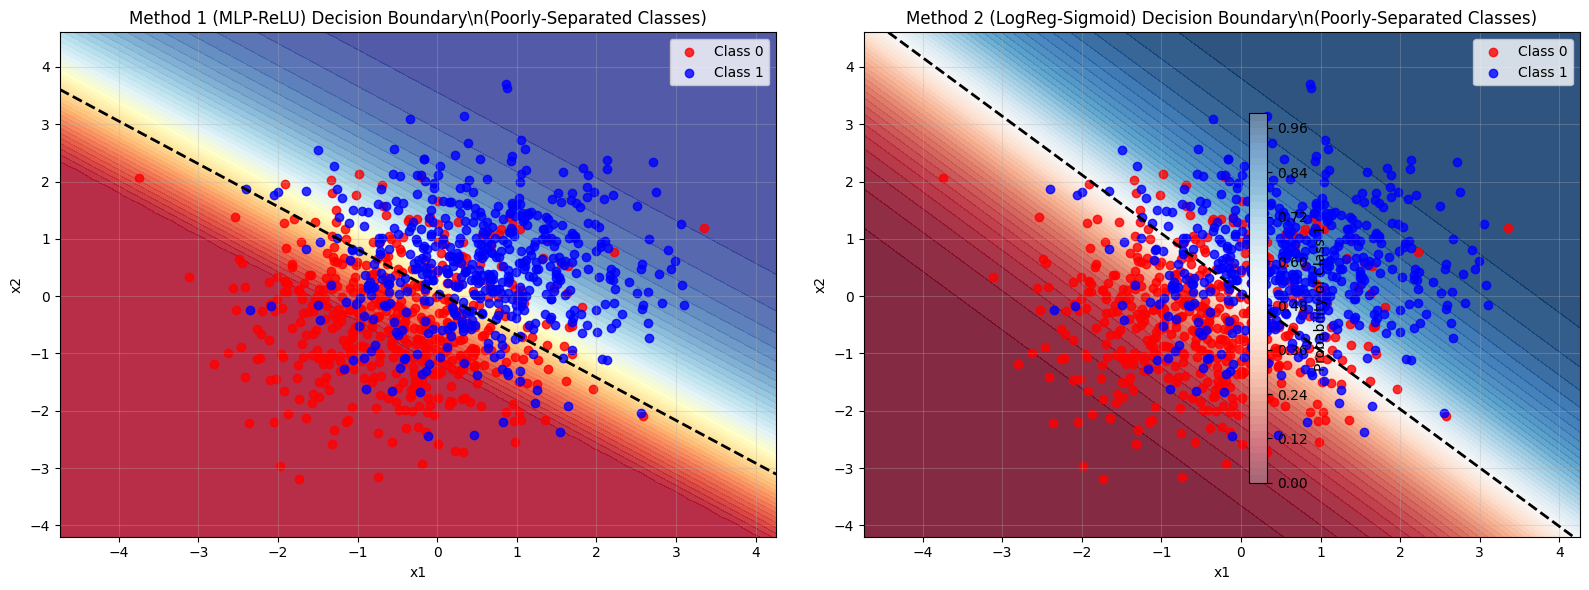

In [10]:
print("="*50)
print("METHODS ON POORLY-SEPARATED DATA")
print("="*50)

# Prepare scaled data for poorly-separated case
X_close_scaled = scaler.transform(X_close)
X_train_close_scaled = scaler.transform(X_train_close)
X_test_close_scaled = scaler.transform(X_test_close)

# Method 1: MLP Classifier with ReLU on poorly-separated data
print("=== METHOD 1: MLP CLASSIFIER WITH RELU - POORLY-SEPARATED ===")
model1_relu_close = MLPClassifier(
    hidden_layer_sizes=(1,),  # Single layer with 1 neuron
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
model1_relu_close.fit(X_train_close_scaled, y_train_close)

y_pred1_relu_close = model1_relu_close.predict(X_test_close_scaled)
accuracy1_relu_close = accuracy_score(y_test_close, y_pred1_relu_close)

print(f"Accuracy: {accuracy1_relu_close:.4f}")
print(f"Number of iterations: {model1_relu_close.n_iter_}")
print(f"Final loss: {model1_relu_close.loss_:.4f}")

# Method 2: Logistic Regression with sigmoid on poorly-separated data
print("\\n=== METHOD 2: LOGISTIC REGRESSION WITH SIGMOID - POORLY-SEPARATED ===")
model2_sigmoid_close = LogisticRegression(random_state=42)
model2_sigmoid_close.fit(X_train_close_scaled, y_train_close)

y_pred2_sigmoid_close = model2_sigmoid_close.predict(X_test_close_scaled)
accuracy2_sigmoid_close = accuracy_score(y_test_close, y_pred2_sigmoid_close)

print(f"Accuracy: {accuracy2_sigmoid_close:.4f}")
print(f"Coefficients: {model2_sigmoid_close.coef_[0]}")
print(f"Intercept: {model2_sigmoid_close.intercept_[0]:.4f}")

print("\\n" + "="*50)
print("CLASSIFICATION REPORTS - POORLY-SEPARATED DATA")
print("="*50)
print("Method 1 (MLP with ReLU):")
print(classification_report(y_test_close, y_pred1_relu_close))
print("\\nMethod 2 (Logistic Regression with Sigmoid):")
print(classification_report(y_test_close, y_pred2_sigmoid_close))

# Confusion Matrices for poorly-separated data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

cm1_close = confusion_matrix(y_test_close, y_pred1_relu_close)
sns.heatmap(cm1_close, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Method 1 (MLP-ReLU) - Confusion Matrix\\n(Poorly-Separated)')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

cm2_close = confusion_matrix(y_test_close, y_pred2_sigmoid_close)
sns.heatmap(cm2_close, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Method 2 (LogReg-Sigmoid) - Confusion Matrix\\n(Poorly-Separated)')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Plot decision boundaries for both methods (poorly-separated data)
plot_decision_boundary_comparison(X_close, y_close, model1_relu_close, model2_sigmoid_close, 
                                'Poorly-Separated Classes')

PERFORMANCE COMPARISON
                                         Method  Accuracy Data_Separation  \
0          Method 1 (MLP-ReLU) - Well-Separated     0.995            High   
1    Method 2 (LogReg-Sigmoid) - Well-Separated     1.000            High   
2        Method 1 (MLP-ReLU) - Poorly-Separated     0.755             Low   
3  Method 2 (LogReg-Sigmoid) - Poorly-Separated     0.775             Low   

  Activation  
0       ReLU  
1    Sigmoid  
2       ReLU  
3    Sigmoid  


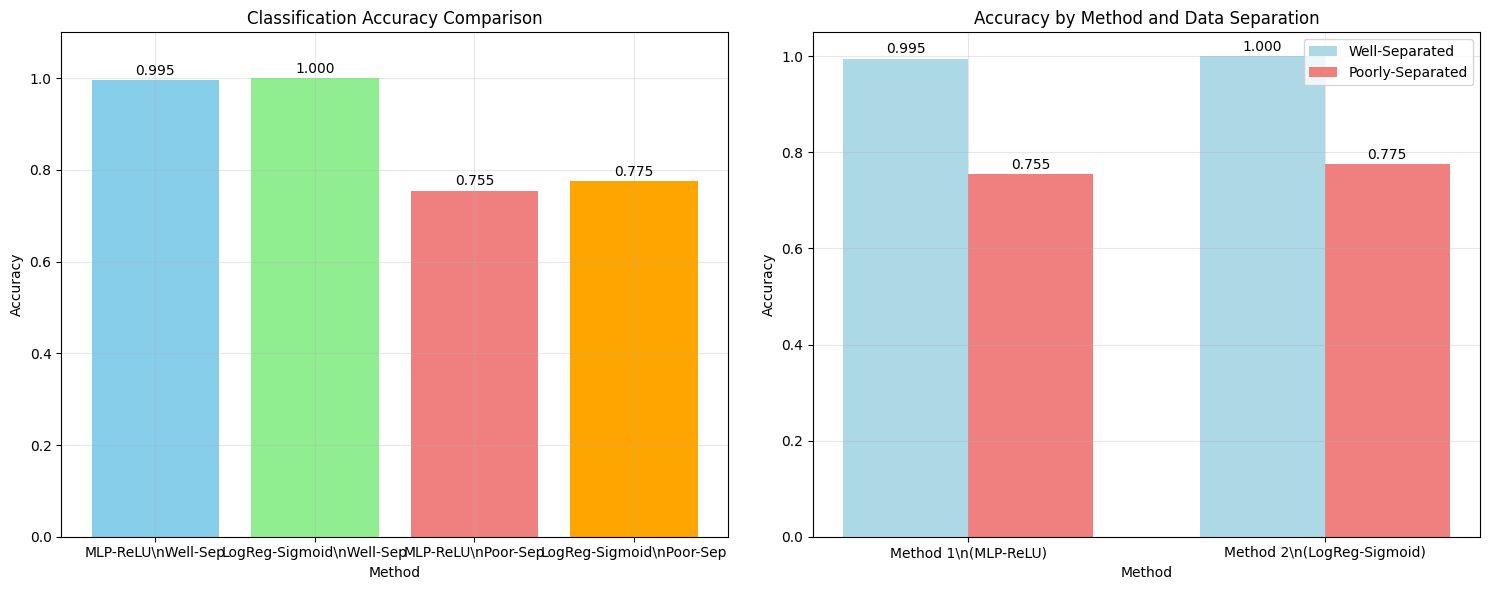

In [11]:
# Performance comparison
print("="*60)
print("PERFORMANCE COMPARISON")
print("="*60)

comparison_data = {
    'Method': [
        'Method 1 (MLP-ReLU) - Well-Separated',
        'Method 2 (LogReg-Sigmoid) - Well-Separated', 
        'Method 1 (MLP-ReLU) - Poorly-Separated',
        'Method 2 (LogReg-Sigmoid) - Poorly-Separated'
    ],
    'Accuracy': [
        accuracy1_relu, 
        accuracy2_sigmoid, 
        accuracy1_relu_close, 
        accuracy2_sigmoid_close
    ],
    'Data_Separation': ['High', 'High', 'Low', 'Low'],
    'Activation': ['ReLU', 'Sigmoid', 'ReLU', 'Sigmoid']
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot comparison
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange']
bars = axes[0].bar(range(len(comparison_df)), comparison_df['Accuracy'], color=colors)
axes[0].set_xlabel('Method')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Classification Accuracy Comparison')
axes[0].set_xticks(range(len(comparison_df)))
axes[0].set_xticklabels([
    'MLP-ReLU\\nWell-Sep', 'LogReg-Sigmoid\\nWell-Sep', 
    'MLP-ReLU\\nPoor-Sep', 'LogReg-Sigmoid\\nPoor-Sep'
], rotation=0, ha='center')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom')

axes[0].set_ylim(0, 1.1)
axes[0].grid(True, alpha=0.3)

# Grouped comparison
well_sep_acc = [accuracy1_relu, accuracy2_sigmoid]
poor_sep_acc = [accuracy1_relu_close, accuracy2_sigmoid_close]

x = np.arange(2)
width = 0.35

bars1 = axes[1].bar(x - width/2, well_sep_acc, width, label='Well-Separated', color='lightblue')
bars2 = axes[1].bar(x + width/2, poor_sep_acc, width, label='Poorly-Separated', color='lightcoral')

axes[1].set_xlabel('Method')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy by Method and Data Separation')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['Method 1\\n(MLP-ReLU)', 'Method 2\\n(LogReg-Sigmoid)'])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                    f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


METHODS ON MOON DATASET (NON-LINEAR SEPARATION)
Moon dataset shape: (1000, 2)
Class distribution: {1: 500, 0: 500}


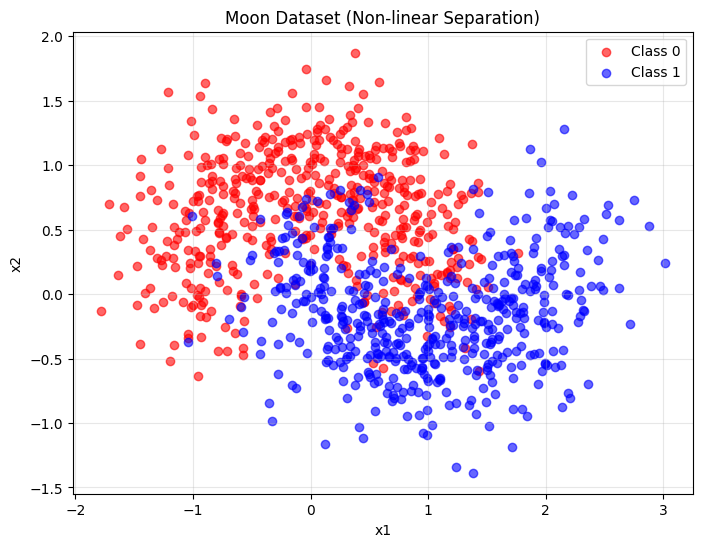

--------------------------------------------------
=== METHOD 1: MLP CLASSIFIER WITH RELU - MOON DATASET ===
Accuracy: 0.9050
Number of iterations: 744
Final loss: 0.4214
\n=== METHOD 2: LOGISTIC REGRESSION WITH SIGMOID - MOON DATASET ===
Accuracy: 0.9150
Coefficients: [ 1.17673144 -1.76836988]
Intercept: -0.0376
\n==================================================
CLASSIFICATION REPORTS - MOON DATASET
Method 1 (MLP with ReLU):
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       100
           1       0.92      0.89      0.90       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200

\nMethod 2 (Logistic Regression with Sigmoid):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       100
           1       0.94      0.89      0.91       100

    accuracy                  

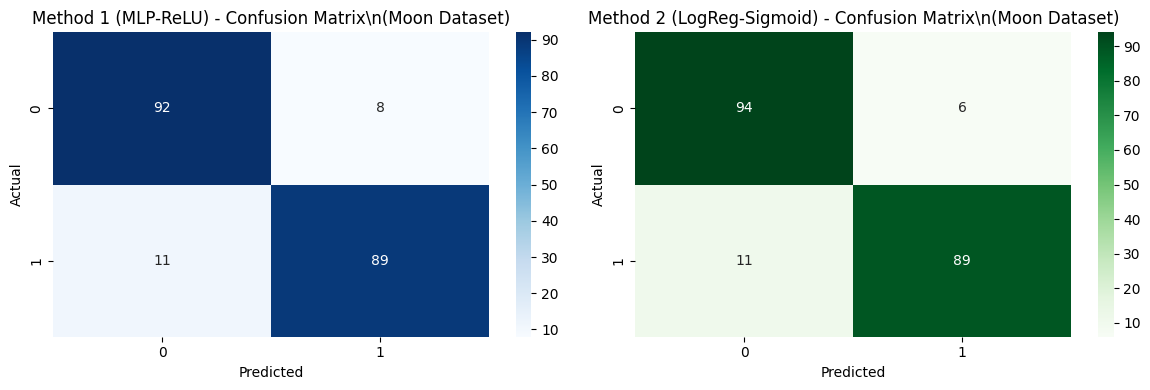

c:\Users\HP\Documents\github_project\atelier_kdd\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\github_project\atelier_kdd\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_8960\1027433984.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


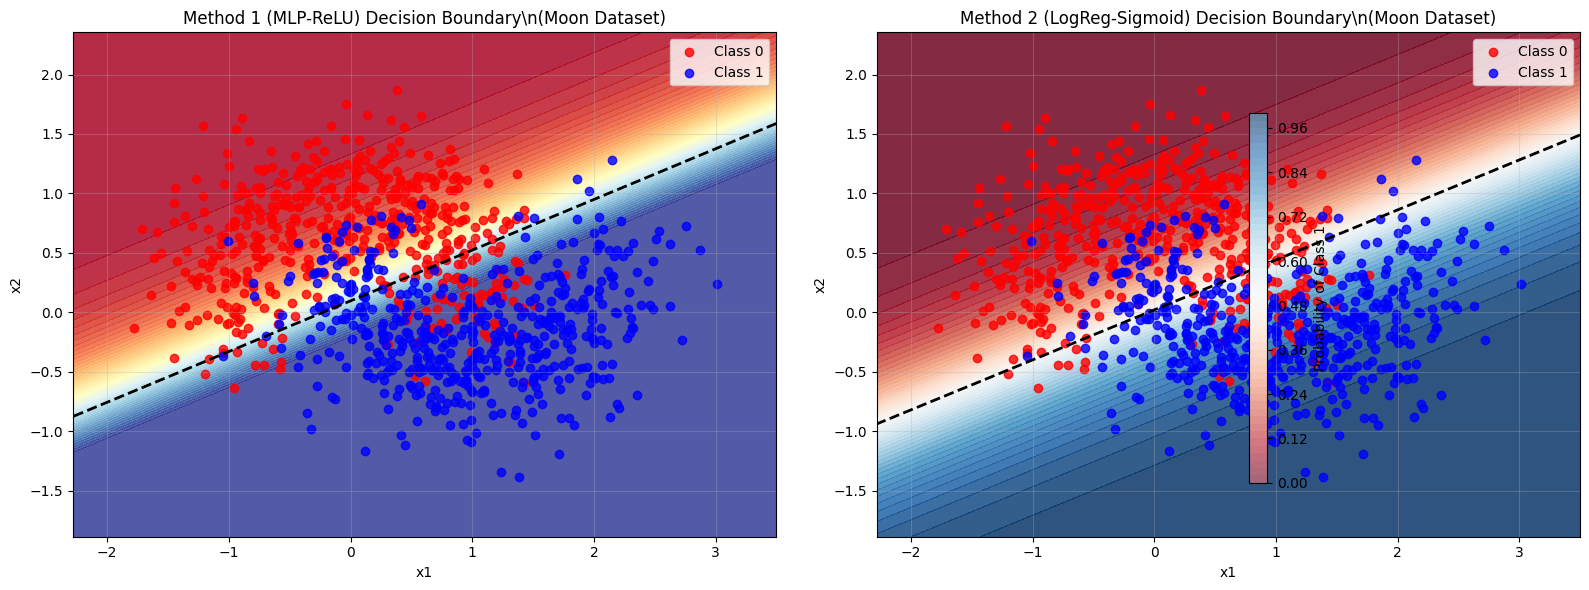

\n============================================================
COMPREHENSIVE PERFORMANCE COMPARISON
            Dataset          Method  Accuracy
0    Well-Separated        MLP-ReLU     0.995
1    Well-Separated  LogReg-Sigmoid     1.000
2  Poorly-Separated        MLP-ReLU     0.755
3  Poorly-Separated  LogReg-Sigmoid     0.775
4      Moon Dataset        MLP-ReLU     0.905
5      Moon Dataset  LogReg-Sigmoid     0.915


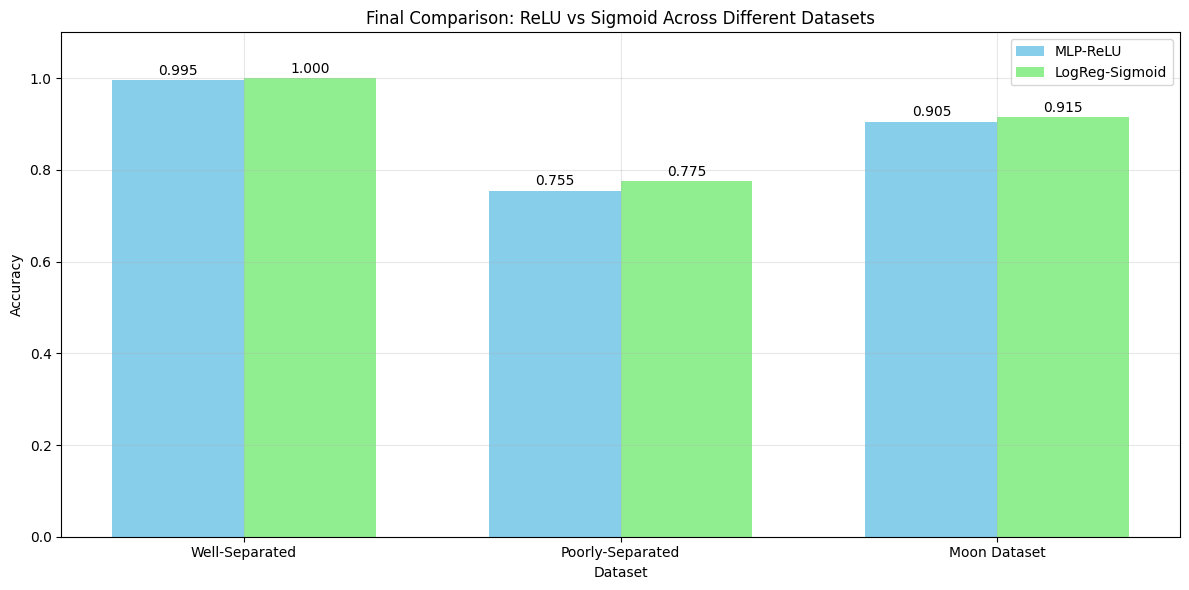

In [13]:
# Apply both methods to Moon dataset from scikit-learn
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

print("="*60)
print("METHODS ON MOON DATASET (NON-LINEAR SEPARATION)")
print("="*60)

# Generate moon dataset
X_moon, y_moon = make_moons(n_samples=1000, noise=0.35, random_state=42)
X_moon_df = pd.DataFrame(X_moon, columns=['x1', 'x2'])
y_moon_df = pd.Series(y_moon, name='class')

# Split the moon data
X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(
    X_moon_df, y_moon_df, test_size=0.2, random_state=42, stratify=y_moon_df
)

# Scale the moon data
scaler_moon = StandardScaler()
X_train_moon_scaled = scaler_moon.fit_transform(X_train_moon)
X_test_moon_scaled = scaler_moon.transform(X_test_moon)

print(f"Moon dataset shape: {X_moon_df.shape}")
print(f"Class distribution: {y_moon_df.value_counts().to_dict()}")

# Plot the moon dataset
plt.figure(figsize=(8, 6))
class_0_moon = X_moon_df[y_moon_df == 0]
class_1_moon = X_moon_df[y_moon_df == 1]

plt.scatter(class_0_moon['x1'], class_0_moon['x2'], c='red', alpha=0.6, label='Class 0')
plt.scatter(class_1_moon['x1'], class_1_moon['x2'], c='blue', alpha=0.6, label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Moon Dataset (Non-linear Separation)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("-" * 50)

# Method 1: MLP Classifier with ReLU on Moon dataset
print("=== METHOD 1: MLP CLASSIFIER WITH RELU - MOON DATASET ===")
model1_relu_moon = MLPClassifier(
    hidden_layer_sizes=(1,),  # Single layer with 1 neuron
    activation='relu',
    solver='adam',
    max_iter=900,
    random_state=42
)
model1_relu_moon.fit(X_train_moon_scaled, y_train_moon)

y_pred1_relu_moon = model1_relu_moon.predict(X_test_moon_scaled)
accuracy1_relu_moon = accuracy_score(y_test_moon, y_pred1_relu_moon)

print(f"Accuracy: {accuracy1_relu_moon:.4f}")
print(f"Number of iterations: {model1_relu_moon.n_iter_}")
print(f"Final loss: {model1_relu_moon.loss_:.4f}")

# Method 2: Logistic Regression with sigmoid on Moon dataset
print("\\n=== METHOD 2: LOGISTIC REGRESSION WITH SIGMOID - MOON DATASET ===")
model2_sigmoid_moon = LogisticRegression(random_state=42)
model2_sigmoid_moon.fit(X_train_moon_scaled, y_train_moon)

y_pred2_sigmoid_moon = model2_sigmoid_moon.predict(X_test_moon_scaled)
accuracy2_sigmoid_moon = accuracy_score(y_test_moon, y_pred2_sigmoid_moon)

print(f"Accuracy: {accuracy2_sigmoid_moon:.4f}")
print(f"Coefficients: {model2_sigmoid_moon.coef_[0]}")
print(f"Intercept: {model2_sigmoid_moon.intercept_[0]:.4f}")

print("\\n" + "="*50)
print("CLASSIFICATION REPORTS - MOON DATASET")
print("="*50)
print("Method 1 (MLP with ReLU):")
print(classification_report(y_test_moon, y_pred1_relu_moon))
print("\\nMethod 2 (Logistic Regression with Sigmoid):")
print(classification_report(y_test_moon, y_pred2_sigmoid_moon))

# Confusion Matrices for Moon dataset
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

cm1_moon = confusion_matrix(y_test_moon, y_pred1_relu_moon)
sns.heatmap(cm1_moon, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Method 1 (MLP-ReLU) - Confusion Matrix\\n(Moon Dataset)')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

cm2_moon = confusion_matrix(y_test_moon, y_pred2_sigmoid_moon)
sns.heatmap(cm2_moon, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Method 2 (LogReg-Sigmoid) - Confusion Matrix\\n(Moon Dataset)')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Decision boundaries for Moon dataset
def plot_decision_boundary_moon(X, y, model1, model2, scaler, title_suffix):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    for i, (model, method_name, cmap) in enumerate([(model1, 'Method 1 (MLP-ReLU)', 'RdYlBu'), 
                                                    (model2, 'Method 2 (LogReg-Sigmoid)', 'RdBu')]):
        # Create a mesh
        h = 0.02
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # Scale the mesh points
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        mesh_points_scaled = scaler.transform(mesh_points)
        Z = model.predict_proba(mesh_points_scaled)[:, 1]
        Z = Z.reshape(xx.shape)
        
        # Plot
        axes[i].contourf(xx, yy, Z, levels=50, alpha=0.6, cmap=cmap)
        im = axes[i].contourf(xx, yy, Z, levels=50, alpha=0.6, cmap=cmap)
        
        # Plot data points (original scale)
        class_0 = X[y == 0]
        class_1 = X[y == 1]
        axes[i].scatter(class_0[:, 0], class_0[:, 1], c='red', alpha=0.8, label='Class 0')
        axes[i].scatter(class_1[:, 0], class_1[:, 1], c='blue', alpha=0.8, label='Class 1')
        
        # Decision boundary (probability = 0.5)
        axes[i].contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)
        
        axes[i].set_xlabel('x1')
        axes[i].set_ylabel('x2')
        axes[i].set_title(f'{method_name} Decision Boundary\\n({title_suffix})')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    # Add colorbar
    plt.colorbar(im, ax=axes, label='Probability of Class 1', shrink=0.8)
    plt.tight_layout()
    plt.show()

# Plot decision boundaries for Moon dataset
plot_decision_boundary_moon(X_moon, y_moon, model1_relu_moon, model2_sigmoid_moon, scaler_moon, 
                           'Moon Dataset')

# Final comparison including Moon dataset
print("\\n" + "="*60)
print("COMPREHENSIVE PERFORMANCE COMPARISON")
print("="*60)

all_comparison_data = {
    'Dataset': [
        'Well-Separated', 'Well-Separated', 
        'Poorly-Separated', 'Poorly-Separated',
        'Moon Dataset', 'Moon Dataset'
    ],
    'Method': [
        'MLP-ReLU', 'LogReg-Sigmoid',
        'MLP-ReLU', 'LogReg-Sigmoid', 
        'MLP-ReLU', 'LogReg-Sigmoid'
    ],
    'Accuracy': [
        accuracy1_relu, accuracy2_sigmoid,
        accuracy1_relu_close, accuracy2_sigmoid_close,
        accuracy1_relu_moon, accuracy2_sigmoid_moon
    ]
}

all_comparison_df = pd.DataFrame(all_comparison_data)
print(all_comparison_df.round(4))

# Final visualization
plt.figure(figsize=(12, 6))
datasets = ['Well-Separated', 'Poorly-Separated', 'Moon Dataset']
relu_scores = [accuracy1_relu, accuracy1_relu_close, accuracy1_relu_moon]
sigmoid_scores = [accuracy2_sigmoid, accuracy2_sigmoid_close, accuracy2_sigmoid_moon]

x = np.arange(len(datasets))
width = 0.35

bars1 = plt.bar(x - width/2, relu_scores, width, label='MLP-ReLU', color='skyblue')
bars2 = plt.bar(x + width/2, sigmoid_scores, width, label='LogReg-Sigmoid', color='lightgreen')

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Final Comparison: ReLU vs Sigmoid Across Different Datasets')
plt.xticks(x, datasets)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()
